In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [ ]:
data=pd.read_csv("/content/sales_data_sample_cleaned.csv" ,encoding= 'latin-1')

In [ ]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADRESSLINE,CITY,COUNTRY,TERRITORY,DEALSIZE,CONTACTNAME
0,10107,30,95.70,2,2871.00,1046044800000000000,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,North_America,Small,Kwai Yu
1,10121,34,81.35,5,2765.90,1052265600000000000,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,EMEA,Small,Paul Henriot
2,10134,41,94.74,2,3884.34,1057017600000000000,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,EMEA,Medium,Daniel Da Cunha
3,10145,45,83.26,6,3746.70,1061769600000000000,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,North_America,Medium,Julie Young
4,10159,49,100.00,14,5205.27,1065744000000000000,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,North_America,Medium,Julie Brown


**Data Visualization**

**Question No 1identifity the number of sale over past servel year**s

In [ ]:

sale_year= data.groupby('YEAR_ID')['SALES'].sum().reset_index() # Convert the Series to a DataFrame
sale_year


,YEAR_ID,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


Text(0.5, 0, 'Year')

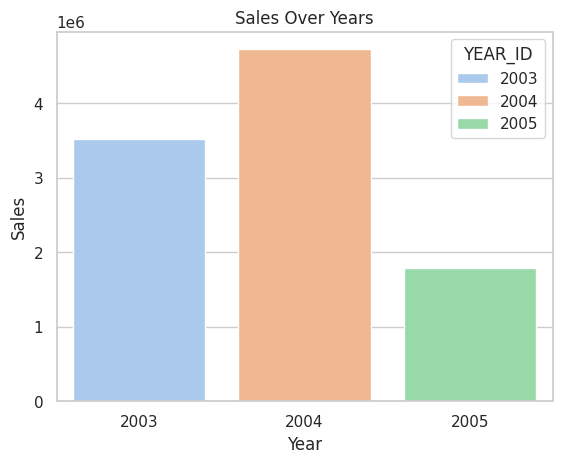

In [ ]:
#Question No 1identifity the number of sale over past servel years
sale_year= data.groupby('YEAR_ID')['SALES'].sum().reset_index() # Convert the Series to a DataFrame
sale_year

#Visualization of the data
sns.set_style('whitegrid')
sale_year_plot = sns.barplot(x='YEAR_ID',y='SALES', hue='YEAR_ID' ,data=sale_year, palette= 'pastel')
plt.title('Sales Over Years')
plt.ylabel('Sales')
plt.xlabel('Year')
sale_year_plot.set_xlabel('Year')

Sales increased significantly from 2003 to 2004, suggesting a strong year-over-year growth trend. The highest sales figure in 2014 compared to 2013 and 2015 indicates a peak period, possibly due to successful product launches, market expansion, or seasonal factors. The EMEA region consistently had the highest sales, reflecting strong market performance, while NA and APAC regions followed.

**Question No 2 Which Month Has the Most Sales?**

In [ ]:

sales_by_month = data.groupby('MONTH_ID')['SALES'].sum().reset_index()
sales_by_month


,MONTH_ID,SALES
0,1,785874.44
1,2,810441.90
2,3,754501.39
3,4,669390.96
4,5,923972.56
5,6,454756.78
6,7,514875.97
7,8,659310.57
8,9,584724.27
9,10,1121215.22


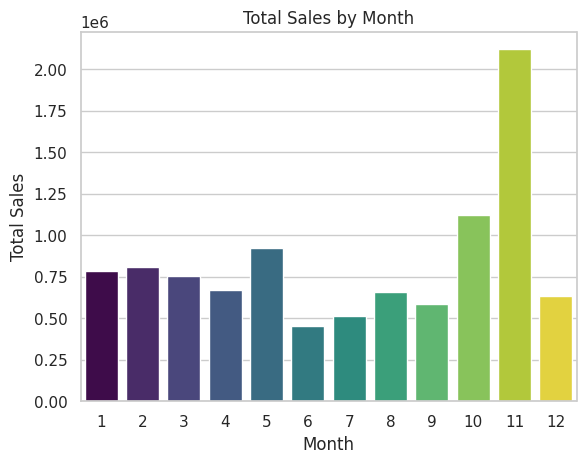

In [ ]:
#Create the bar plot using Seaborn with a color palette
sns.barplot(x='MONTH_ID', y='SALES', hue='MONTH_ID', data=sales_by_month, palette='viridis', legend=False)

# Add titles and labels
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Show the plot
plt.show()


The significant sales increase in the 11th month suggests a strong seasonal trend, likely due to holiday shopping or year-end promotions, while other months experience lower sales, indicating that November might be a key period for targeted marketing and sales strategies.Other months have lower sales figures, indicating that November is a critical period for maximizing revenue and focusing marketing efforts.

**question:3 WHich country have most sale**

In [ ]:
sales_by_month_region =data.groupby(['COUNTRY', 'TERRITORY'])['SALES'].sum().unstack()
sales_by_month_region


TERRITORY,APAC,EMEA,Japan,North_America
COUNTRY,,,,
Australia,630623.10,NaN,NaN,NaN
Austria,NaN,202062.53,NaN,NaN
Belgium,NaN,108412.62,NaN,NaN
Canada,NaN,NaN,NaN,224078.56
Denmark,NaN,245637.15,NaN,NaN
Finland,NaN,329581.91,NaN,NaN
France,NaN,1110916.52,NaN,NaN
Germany,NaN,220472.09,NaN,NaN
Ireland,NaN,57756.43,NaN,NaN


Text(0, 0.5, 'Total Sales')

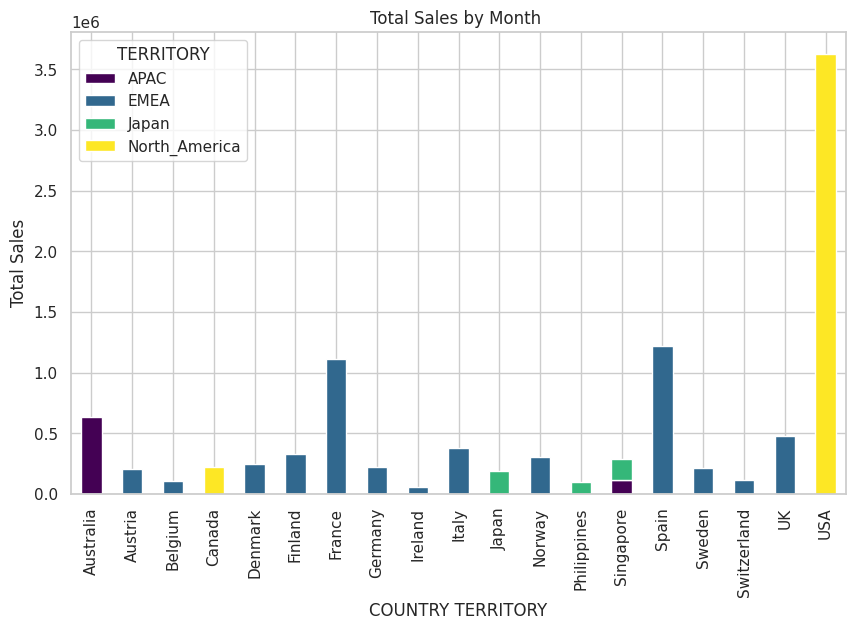

In [ ]:
sales_by_month_region.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

# Add titles and labels
plt.title('Total Sales by Month ')
plt.xlabel('COUNTRY TERRITORY')
plt.ylabel('Total Sales')


The United States dominates sales, contributing over 52% of total global sales, indicating it is the primary market driver and a crucial focus for customer engagement and business strategies.

**Question 4: How does the total sales distribution vary across different territories on a month-by-month basis? **

In [ ]:
sales_by_month_region1 =data.groupby(['MONTH_ID', 'TERRITORY'])['SALES'].sum().unstack()
sales_by_month_region1

TERRITORY,APAC,EMEA,Japan,North_America
MONTH_ID,,,,
1,29852.17,434478.17,88682.03,232862.07
2,95587.19,466432.92,NaN,248421.79
3,35160.25,391114.24,59420.62,268806.28
4,52985.24,316151.67,61325.85,238928.20
5,68087.70,521779.16,NaN,334105.70
6,45788.72,182577.36,25928.75,200461.95
7,82029.22,224900.59,NaN,207946.16
8,NaN,214871.24,3127.88,441311.45
9,100734.89,295591.11,44219.36,144178.91


Text(0, 0.5, 'Total Sales')

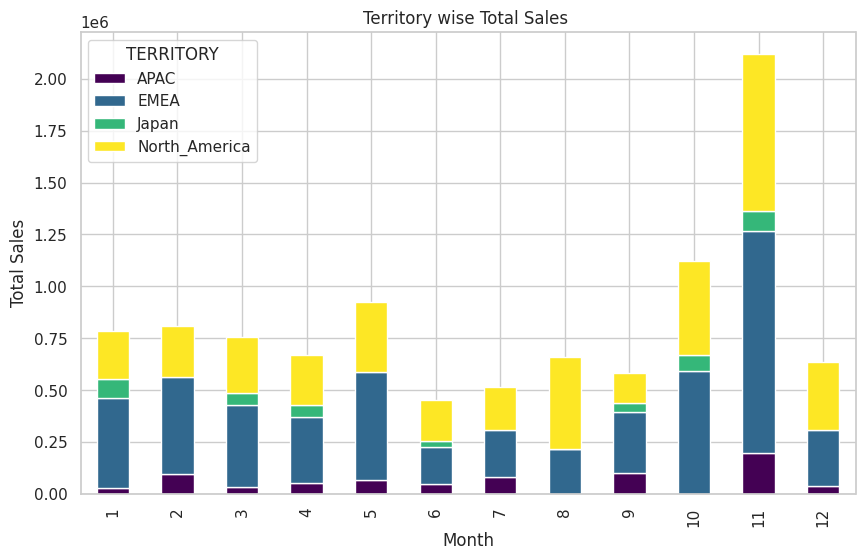

In [ ]:
sales_by_month_region1.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

# Add titles and labels
plt.title('Territory wise Total Sales ')
plt.xlabel('Month')
plt.ylabel('Total Sales')


Sales peak significantly in November across all territories, with EMEA and North America showing the highest figures. EMEA maintains strong sales throughout the year, while North America has notable peaks in May and November. APAC and Japan exhibit more variable sales patterns.

The month-by-month sales distribution reveals that November consistently sees the highest sales across all territories, likely due to holiday shopping. North America leads in sales, reflecting its strong consumer market, while Japan shows the lowest sales, possibly due to different cultural shopping habits or market saturation.


**question:5** **What are the total sales by quarter?** bold text

In [ ]:
sales_by_quarter = data.groupby('QTR_ID')['SALES'].sum().reset_index()
sales_by_quarter


,QTR_ID,SALES
0,1,2350817.73
1,2,2048120.30
2,3,1758910.81
3,4,3874780.01


Text(0, 0.5, 'Total Sales')

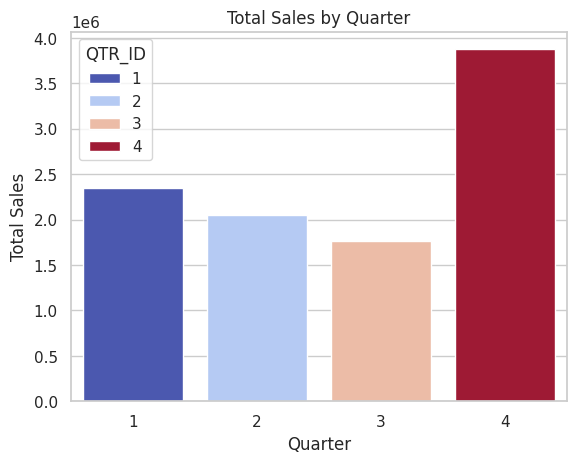

In [ ]:
sns.barplot(x='QTR_ID', y='SALES', data=sales_by_quarter, hue='QTR_ID', palette='coolwarm')

# Add titles and labels
plt.title('Total Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')



Total sales by quarter reveal that Q4 consistently has the highest sales, likely driven by increased order quantities due to end-of-year corporate purchasing, inventory restocking, and strategic business spending, making it the most profitable quarter. Q1 shows a strong start to the year, while Q2 and Q3 experience lower sales, indicating potential dips in mid-year revenue.

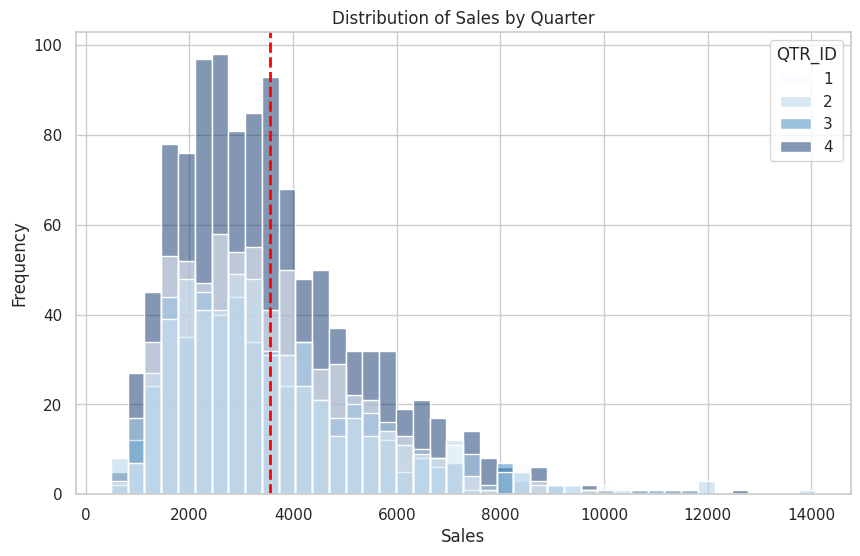

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram plot with average color
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='SALES', hue='QTR_ID',color='skyblue', palette='Blues')
#add a vertical line for averge sale
plt.axvline(data['SALES'].mean(), color='red', linestyle='dashed', linewidth=2, label='Average Sale')



# Add titles and labels
plt.title('Distribution of Sales by Quarter')
plt.xlabel('Sales')
plt.ylabel('Frequency')
# Show the plot
plt.show()


***Question:6 define the most order product type ***

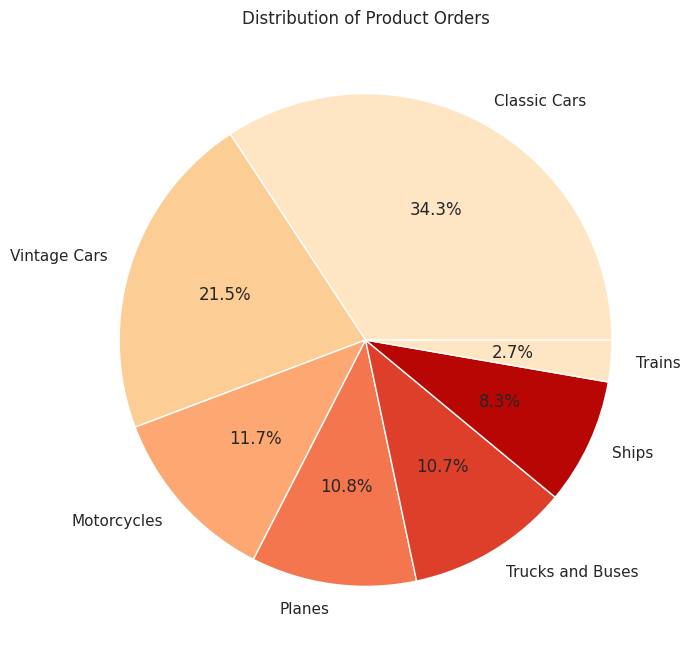

In [ ]:
plt.figure(figsize=(8, 8))
data['PRODUCTLINE'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution of Product Orders')
plt.ylabel('')
plt.show()

The above graph shows that the products with the lowest price were sold the most, whereas the products with a high price were the least popular.

From the plot, 'Classic Cars" & "Vintage Cars" are the most demanded products, 'Trains" was the least demanded product

In [ ]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADRESSLINE,CITY,COUNTRY,TERRITORY,DEALSIZE,CONTACTNAME
0,10107,30,95.70,2,2871.00,1046044800000000000,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,North_America,Small,Kwai Yu
1,10121,34,81.35,5,2765.90,1052265600000000000,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,EMEA,Small,Paul Henriot
2,10134,41,94.74,2,3884.34,1057017600000000000,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,EMEA,Medium,Daniel Da Cunha
3,10145,45,83.26,6,3746.70,1061769600000000000,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,North_America,Medium,Julie Young
4,10159,49,100.00,14,5205.27,1065744000000000000,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,North_America,Medium,Julie Brown


***Question 7 :Calculte the average sale per deal size ***

In [ ]:
average_sales = data.groupby('DEALSIZE')['SALES'].mean().reset_index()
average_sales

,DEALSIZE,SALES
0,Large,8293.753248
1,Medium,4398.433699
2,Small,2061.682800


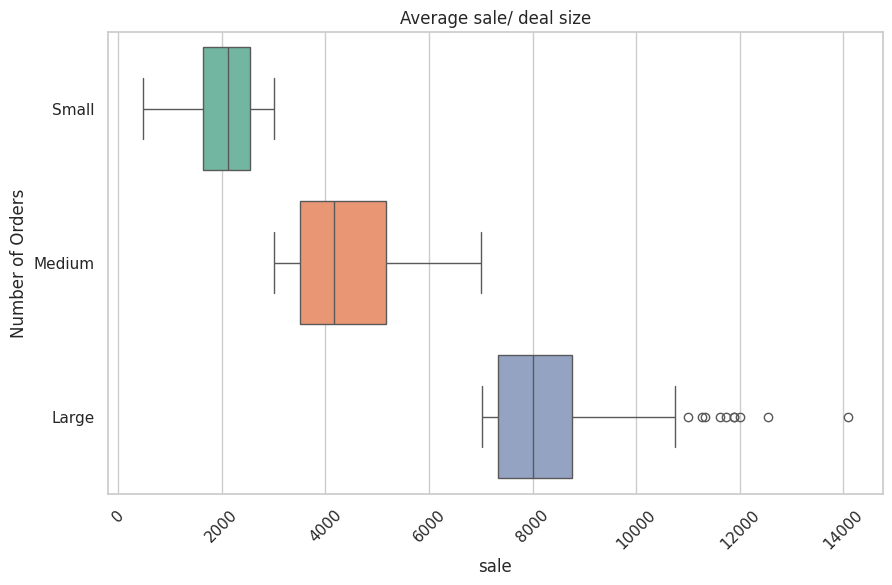

In [ ]:
sns.set_style("whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='SALES', y='DEALSIZE', hue='DEALSIZE', legend=False, data=data, palette='Set2')

plt.title('Average sale/ deal size')
plt.xlabel('sale')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


The average sale per deal size shows a clear trend: Large deals generate significantly higher sales compared to Medium and Small deals. This indicates that focusing on larger transactions can substantially boost overall revenue. The pattern suggests that regions with a higher frequency of large deals, such as EMEA and USA, are more profitable, while medium and small deal sizes contribute less to total sales.

**Question **8**: find the Distribution of Deal Sizes Across Different Territories?** **bold text**

In [ ]:
distribution = data.groupby(['TERRITORY', 'DEALSIZE']).size().reset_index(name='COUNT')
print(distribution)

        TERRITORY DEALSIZE  COUNT
0            APAC    Large      8
1            APAC   Medium    101
2            APAC    Small    112
3            EMEA    Large     77
4            EMEA   Medium    687
5            EMEA    Small    643
6           Japan    Large      7
7           Japan   Medium     58
8           Japan    Small     56
9   North_America    Large     65
10  North_America   Medium    538
11  North_America    Small    471


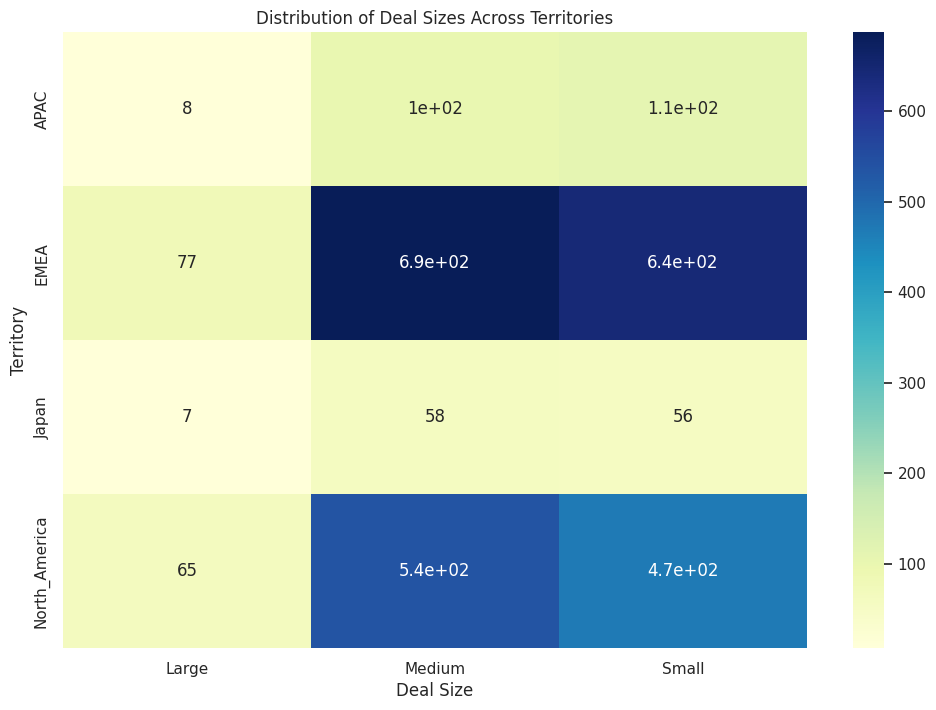

In [ ]:
deal_size_territory = data.groupby(['TERRITORY', 'DEALSIZE']).size().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(deal_size_territory, annot=True, cmap='YlGnBu')
plt.title('Distribution of Deal Sizes Across Territories')
plt.xlabel('Deal Size')
plt.ylabel('Territory')
plt.show()

EMEA leads with the highest counts of large deals, indicating a strong market for high-value transactions, and also shows significant numbers of medium and small deals. North America has a robust market with many medium and small deals, though fewer large ones compared to EMEA. APAC and Japan show lower counts for large deals, with Japan having the smallest overall deal sizes, suggesting potential areas for market growth or strategic adjustments.

Q**uestion 9: What are the counts of deals for each product line and deal size, and how do these counts vary across different product lines?**
**bold text**

In [ ]:
deal_counts = data.groupby(['PRODUCTLINE', 'DEALSIZE']).size().reset_index(name='COUNT')
deal_counts

,PRODUCTLINE,DEALSIZE,COUNT
0,Classic Cars,Large,97
1,Classic Cars,Medium,530
2,Classic Cars,Small,340
3,Motorcycles,Large,19
4,Motorcycles,Medium,156
5,Motorcycles,Small,156
6,Planes,Large,9
7,Planes,Medium,129
8,Planes,Small,168
9,Ships,Medium,107


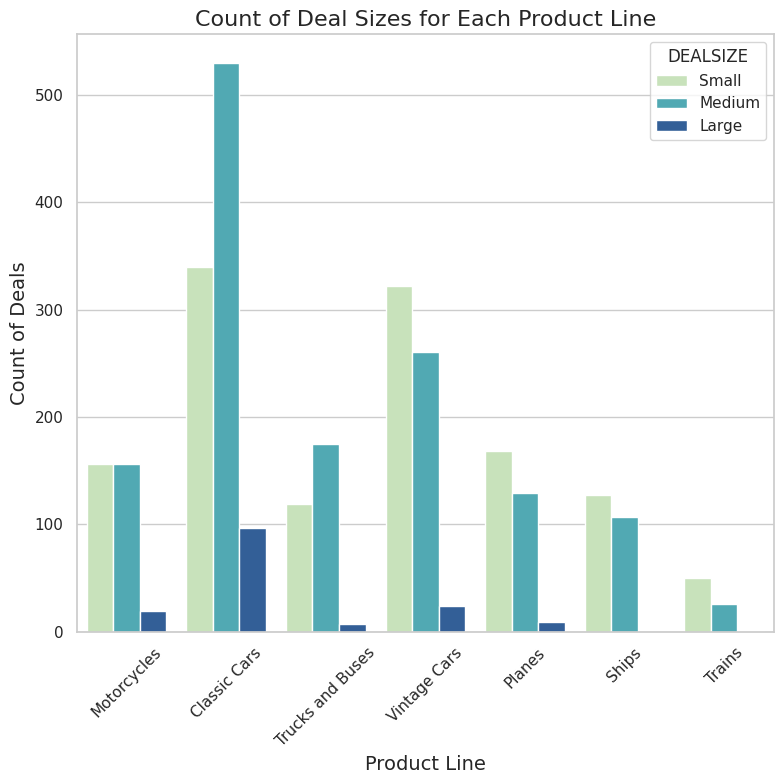

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=data, x='PRODUCTLINE', hue='DEALSIZE', palette='YlGnBu')

# Add titles and labels
plt.title('Count of Deal Sizes for Each Product Line', fontsize=16)
plt.xlabel('Product Line', fontsize=14)
plt.ylabel('Count of Deals', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


The data reveals that Classic Cars and Vintage Cars dominate in medium-sized deals, with Classic Cars also having a high count of small deals. Motorcycles and Planes show fewer large deals, indicating these products are less frequently involved in high-value transactions. Trains and Trucks and Buses have a lower overall deal count, with Trains particularly underrepresented in large deals, suggesting potential areas for growth or reevaluation in high-value sales strategies.

** finding the correlation between variables.**



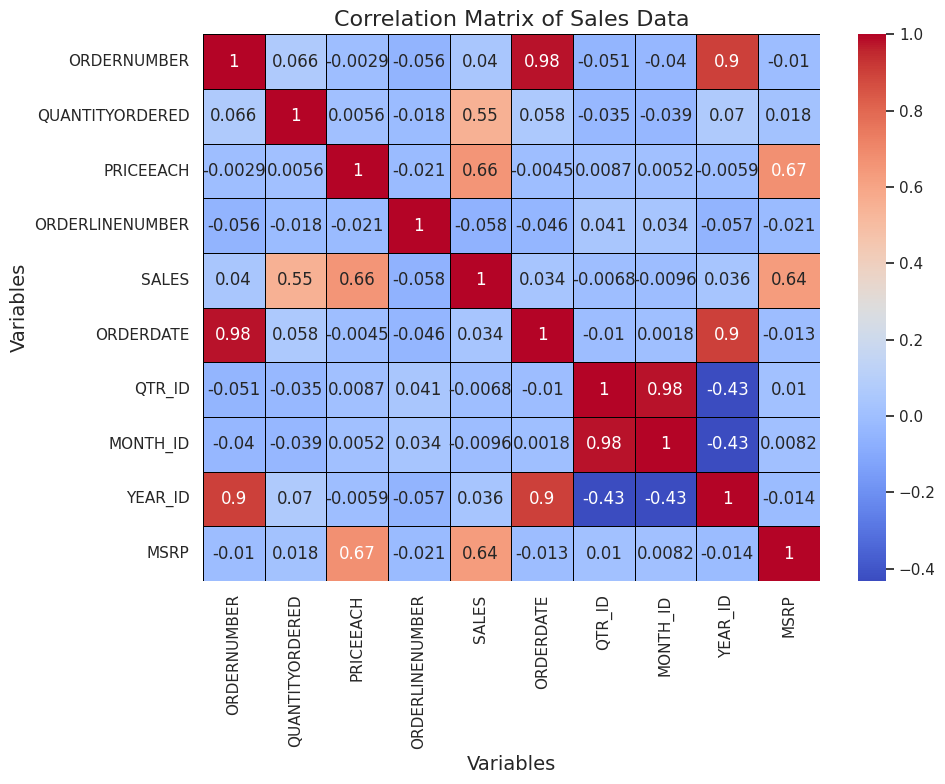

In [ ]:
# Calculate correlation matrix for numeric columns only
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Set style for the plot
sns.set_style("whitegrid")

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')

# Add titles and labels
plt.title('Correlation Matrix of Sales Data', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

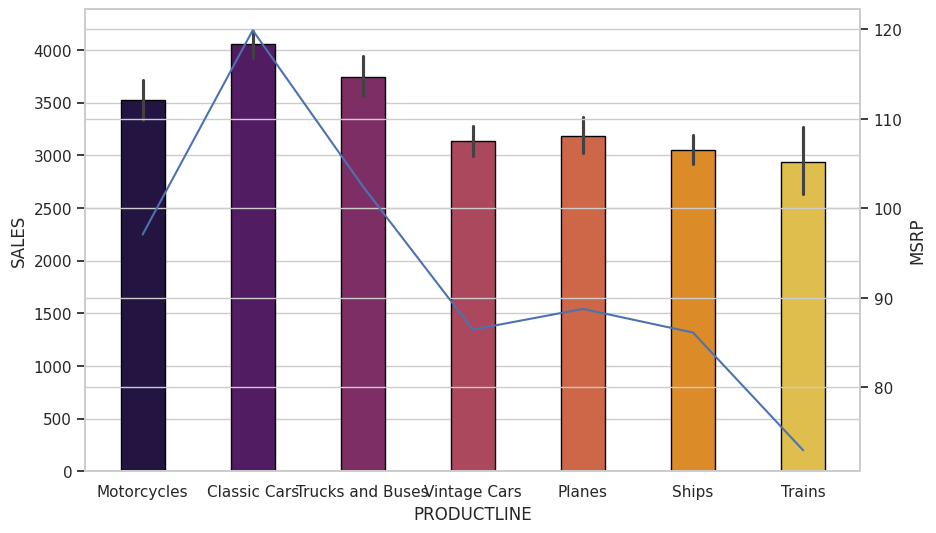

In [ ]:
# set the width and height of the figure
plt.figure(figsize=(10,6))


ax= sns.barplot(data=data, x ="PRODUCTLINE", y = "SALES", hue="PRODUCTLINE", palette="inferno",
                             edgecolor="black", dodge=False, width=0.4)
ax2 = plt.twinx()
sns.lineplot(data=data, x="PRODUCTLINE", y='MSRP', errorbar=None, color="b")

# adding labels
tb = ["3.91M", "1.16M", '976K', '714K', '226K', '1.12M', '1.90M' ]

The above graph shows that the products with the lowest price were sold the most, whereas the products with a high price were the least popular.

From the plot, 'Classic Cars" & "Vintage Cars" are the most demanded products, 'Trains" was the least demanded product

**Question 10: How do total sales differ across various order statuses**

In [ ]:
sales_by_status = data.groupby('STATUS')['SALES'].sum().reset_index()
sales_by_status

,STATUS,SALES
0,Cancelled,194487.48
1,Disputed,72212.86
2,In Process,144729.96
3,On Hold,178979.19
4,Resolved,150718.28
5,Shipped,9291501.08


<ipython-input-62-ecf001853275>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_by_status, x='STATUS', y='SALES', palette='inferno')


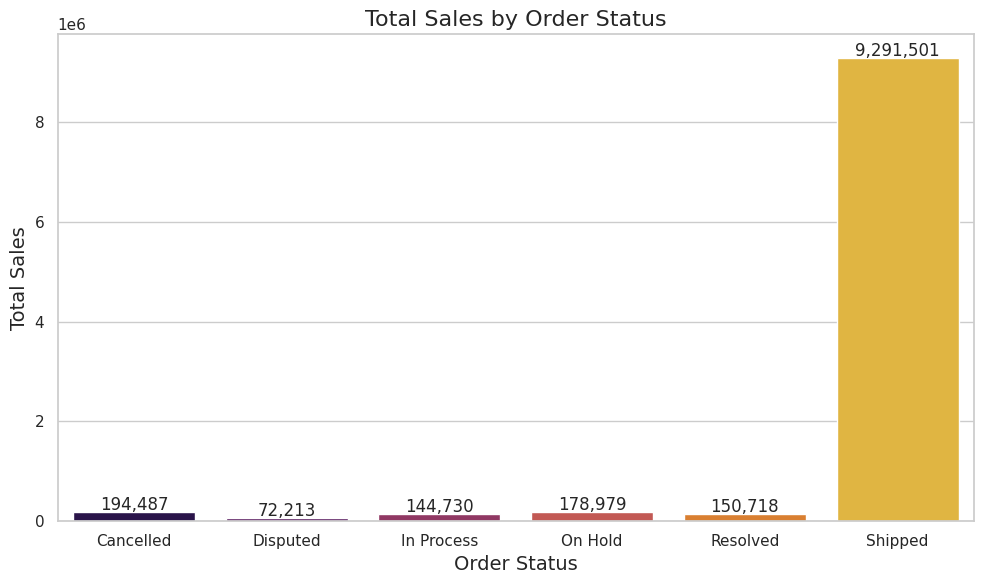

In [ ]:
# Set the Seaborn style
sns.set_style("whitegrid")

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=sales_by_status, x='STATUS', y='SALES', palette='inferno')

# Add titles and labels
plt.title('Total Sales by Order Status', fontsize=16)
plt.xlabel('Order Status', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Add labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

The total sales differ significantly across order statuses, with Shipped orders generating the highest sales, indicating successful fulfillment and completion of transactions. In contrast, Cancelled and Disputed statuses show much lower sales, reflecting lost revenue or unresolved issues. In Process, On Hold, and Resolved statuses fall in between, suggesting that while they contribute to sales, they are less impactful compared to completed shipments. This highlights the importance of focusing on order fulfillment to maximize sales revenue.

**Question 11: How are order statuses distributed across different territories, and what does the distribution reveal about the status of orders in each territory?**

In [ ]:
status_by_territory = data.groupby(['TERRITORY', 'STATUS']).size().unstack().fillna(0)
status_by_territory

STATUS,Cancelled,Disputed,In Process,On Hold,Resolved,Shipped
TERRITORY,,,,,,
APAC,0.0,5.0,13.0,0.0,0.0,203.0
EMEA,46.0,9.0,24.0,6.0,34.0,1288.0
Japan,0.0,0.0,0.0,0.0,0.0,121.0
North_America,14.0,0.0,4.0,38.0,13.0,1005.0


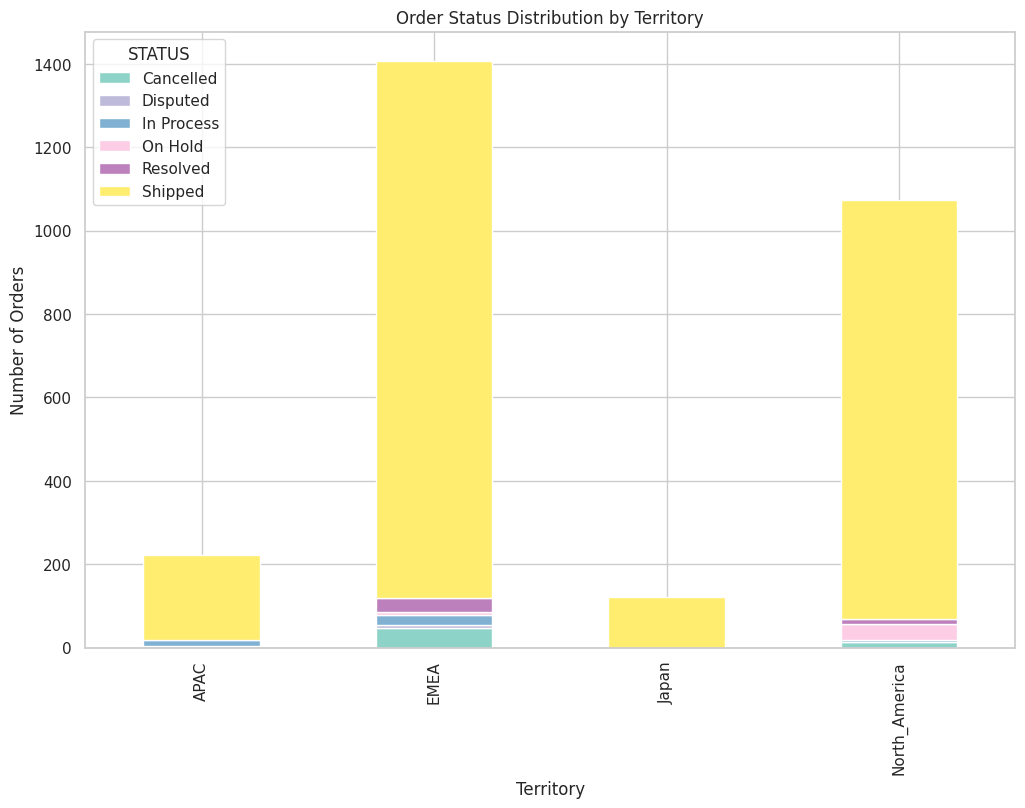

In [ ]:
status_by_territory = data.groupby(['TERRITORY', 'STATUS']).size().unstack().fillna(0)
status_by_territory.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set3', title='Order Status Distribution by Territory')
plt.xlabel('Territory')
plt.ylabel('Number of Orders')
plt.show()


EMEA and North America lead in shipped orders, indicating strong fulfillment in these regions. EMEA also shows higher counts of cancelled and disputed orders, suggesting potential issues with order processing. North America has a notable number of orders on hold, which could reflect logistical challenges. Japan has a high count of shipped orders with minimal issues, indicating efficient processing